In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics import mean_absolute_error
from numpy import nan
from numpy import isnan
import matplotlib.pyplot as plt 
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


 **In the following lines, We will be reading the train dataset & the test dataset using csv.**

In [2]:
train_file_path = '/kaggle/input/titanic/train.csv'
train_data = pd.read_csv(train_file_path)
test_file_path = '/kaggle/input/titanic/test.csv'
test_data = pd.read_csv(test_file_path)

# First: Exploring the data
**Using describe() function, I would be able to view statistics of the given datasets in order to understand them more.**

In [3]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


 **We also use head() function to view part of the dataset itself so we can get familiar with it and check what columns do we have.**
 
 **We notice that there are some NaN values in the columns.**

In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**We apply describe() & head() to the test dataset as well.**

In [5]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


**Nan values are also noticed in the test dataset.**

In [6]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**To get a better understanding and view which data exactly is missing from both train & test datasets. We use info() function & the output would be indicate which columns have missing values and what data type each column has.**

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


**Using isnull().sum() on train dataset & test dataset, we view which column has NaN values and the count of it.**
**It is noticed from the following that train dataset has 177 values missing in age, 687 values missing in Cabin and 2 values missing from Embarked**

In [9]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**It is noticed from the following that test dataset has 86 NaN values in Age, 1 NaN value in Fare and 327 NaN values in Cabin.**

In [10]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Second: Data preprocessing
**In the next cell, I will be filling the missing values in Age using mean, I used mean method to fill in the missing values.**

In [11]:
train_data["Age"] = train_data["Age"].replace(0, nan)
train_data["Age"].fillna(train_data["Age"].mean(), inplace=True)
print(train_data.isnull().sum())
test_data["Age"] = test_data["Age"].replace(0, nan)
test_data["Age"].fillna(test_data["Age"].mean(), inplace=True)
print(test_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


**As we can see the count of S is the highest, so most probably the missing data would be from S, that's why we will fill the missing data of Embarked with S.**

In [12]:
countofEmbarked = train_data['Embarked'].value_counts()
print(countofEmbarked)

S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [13]:
train_data["Embarked"] = train_data["Embarked"].replace(0, nan)
train_data["Embarked"].fillna('S', inplace=True)
print(train_data.isnull().sum())
test_data["Embarked"] = test_data["Embarked"].replace(0, nan)
test_data["Embarked"].fillna('S', inplace=True)
print(test_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


**A lot of values from the Cabin column is missing from the train dataset(more than 75%) & same thing for the test dataset.**
**Therefore, Cabin column will be dropped from both train dataset & test dataset as filling with any method would probably give inaccurate results because we have a lot of missing values in the Cabin column.**

In [14]:
train_data.drop(['Cabin'],axis = 'columns', inplace = True )
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [15]:
test_data.drop(['Cabin'],axis = 'columns', inplace = True )
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,S


**We also need to fill missing values in the Fare column, it wouldn't make a huge difference whether we use median or mean methods because the number of missing values in Fare column is really small compared to the whole dataset.**
**I decided here to fill the missing values using median().**

In [16]:
train_data["Fare"] = train_data["Fare"].replace(0, nan)
train_data["Fare"].fillna(train_data["Fare"].median(), inplace=True)
print(train_data.isnull().sum())
test_data["Fare"] = test_data["Fare"].replace(0, nan)
test_data["Fare"].fillna(test_data["Fare"].median(), inplace=True)
print(test_data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


**After replacing NaN values in the columns of the datasets, we will start categorizing our targeted columns or in other words, which columns that are effective in building a model.**


**First, I will start with binarizing the 'Sex' column. Females will be assigned a value of 1 & males will be assigned a value of 0.**

In [17]:
train_data['Sex'] = (train_data['Sex'] == 'female').astype(int)
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,C


**and here we are repeating the same process for the test dataset as well.**

In [18]:
test_data['Sex'] = (test_data['Sex'] == 'female').astype(int)
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",0,34.50000,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.00000,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.00000,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",0,27.00000,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.00000,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,30.27259,0,0,A.5. 3236,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.00000,0,0,PC 17758,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,"Ware, Mr. Frederick",0,30.27259,0,0,359309,8.0500,S


**In the next step, we will work on the Embarked column.**
**Passengers on the titanic, embarked from 3 Ports S,C and Q.**
**People that embarked from port S had lower chances of survival, that's why I will numerize the categories from strings to numbers (from 0 to 2) so we can use the Emarked column in the model.**
**And as we know, we will apply this preprocessing to train dataset & test dataset.**

In [19]:
print(pd.pivot_table(train_data, index = 'Survived', columns = 'Embarked', values = 'Sex' ,aggfunc ='count'))

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  219


In [20]:
fixEmb = train_data['Embarked'].copy().values
fixEmb[fixEmb =='S'] = 0
fixEmb[fixEmb =='C'] = 1
fixEmb[fixEmb =='Q'] = 2
train_data.loc[:,'Embarked'] = fixEmb

fixEmbtest = test_data['Embarked'].copy().values
fixEmbtest[fixEmbtest =='S'] = 0 
fixEmbtest[fixEmbtest =='C'] = 1
fixEmbtest[fixEmbtest =='Q'] = 2
test_data.loc[:,'Embarked'] = fixEmbtest

**The next feature to preprocess is the Fare.**
**Here, the Fare is preprocessed by dividing the Fare into 3 quartiles (low fare, Medium fare & High fare). To perform this, I used pd.qcut.**
**Then, we number each quartile, where the low fare quartile is 0, medium fare is 1 & High fare is 2.
Categorizing fares this way makes it suitable to fit inside the model.**

In [21]:
train_data['FareFix']=pd.qcut(train_data['Fare'],q=[0, .3, .6,1], labels=["lowFare", "MediumFare", "HighFare"])
newFare = train_data['FareFix'].copy().values.astype(str)
newFare[newFare == "lowFare"] = 0
newFare[newFare =="MediumFare"] = 1
newFare[newFare == "HighFare"] = 2
train_data.loc[:,'FareFix'] = newFare
#train_data['FareFix'].astype(int)
train_data.loc[:,'Fare'] = newFare


test_data['FareFixtest']=pd.qcut(test_data['Fare'], q=[0, .3, .6,1], labels=["lowFare", "MediumFare", "HighFare"])
newFaretest = test_data['FareFixtest'].copy().values.astype(str)
newFaretest[newFaretest == "lowFare"] = 0
newFaretest[newFaretest =="MediumFare"] = 1
newFaretest[newFaretest == "HighFare"] = 2
test_data.loc[:,'FareFixtest'] = newFaretest
#test_data['FareFix'].astype(int)
test_data.loc[:,'Fare'] = newFaretest

**Using the same method in Fare, I will use it here for Age, I divided Age into 4 quartiles. Child ranges from 0 to 18% , Adult ranges from 18 to 40 % , Middle Aged ranges from 40 to 60 and finally Old ranges from 60% to 100%.**

In [22]:
train_data['AgeFix']=pd.qcut(train_data['Age'], q=[0, .18, .4, .6, 1], labels=["Child","Adult","MiddleAged", "Old"])
newAge = train_data['AgeFix'].copy().values.astype(str)
newAge[newAge == "Child"] = 0
newAge[newAge == "Adult"] = 1
newAge[newAge == "MiddleAged"] = 2
newAge[newAge == "Old"] = 3
train_data.loc[:,'Age'] = newAge

test_data['newAgetest']=pd.qcut(test_data['Age'], q=[0, .18, .4, .6, 1], labels=["Child","Adult","MiddleAged", "Old"])
newAgetest = test_data['newAgetest'].copy().values.astype(str)
newAgetest[newAgetest == "Child"] = 0
newAgetest[newAgetest == "Adult"] = 1
newAgetest[newAgetest == "MiddleAged"] = 2
newAgetest[newAgetest == "Old"] = 3
test_data.loc[:,'Age'] = newAgetest

In [23]:
countAnalysis = train_data['Age'].value_counts()
print(countAnalysis)

3    330
2    199
1    198
0    164
Name: Age, dtype: int64


**As noticed from the following pivot table, the survival rate in children and old people is the highest.**

In [24]:
print(pd.pivot_table(train_data, index = 'Survived', columns = 'Age', values = 'Sex' ,aggfunc ='count'))

Age        0    1    2    3
Survived                   
0         85  129  139  196
1         79   69   60  134


**In the next lines, I wanted to check the new types of data and how Age changed from float to object & same thing for Fare.**
**Embarked changed from string to object.**

In [25]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    int64   
 5   Age          891 non-null    object  
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    object  
 10  Embarked     891 non-null    object  
 11  FareFix      891 non-null    object  
 12  AgeFix       891 non-null    category
dtypes: category(1), int64(6), object(6)
memory usage: 84.7+ KB


In [26]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    int64   
 2   Name         418 non-null    object  
 3   Sex          418 non-null    int64   
 4   Age          418 non-null    object  
 5   SibSp        418 non-null    int64   
 6   Parch        418 non-null    int64   
 7   Ticket       418 non-null    object  
 8   Fare         418 non-null    object  
 9   Embarked     418 non-null    object  
 10  FareFixtest  418 non-null    object  
 11  newAgetest   418 non-null    category
dtypes: category(1), int64(5), object(6)
memory usage: 36.7+ KB


# Third: Model training & Building

**In the next cell, I will start by importing some libraries that I will need in this proccess.**

In [27]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, GridSearchCV #for K-fold cross validation

**I used 3 Models. Random Forest Classifier, Logistic Regression & Decision Tree.**

In [28]:
features = ['Age','Sex','Fare','Pclass','Embarked','SibSp'] #choosing features that the model will consider when its built
X = train_data[features]
y = train_data.Survived
test_X = test_data[features]

rf_model = RandomForestClassifier(random_state = 1) #defining Random Classifier model
rf_model.fit(X, y) #training model
test_predictions = rf_model.predict(test_X) #prediction 

LR_model = LogisticRegression() #defining Logistic regression model
LR_model.fit(X, y) # training model
test_predictions2 = LR_model.predict(test_X) #prediction

Dt_model = DecisionTreeClassifier(random_state = 1) # defining Decision tree classifier
Dt_model.fit(X, y) #training model
test_predictions3 = Dt_model.predict(test_X) #prediction

**In the next cell, I will be outputting each model prediction into a file.**

In [29]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId,
                       'Survived': test_predictions})
out = pd.DataFrame(data = output)
out.to_csv('submissionRF.csv', index=False)

output2 = pd.DataFrame({'PassengerId': test_data.PassengerId,
                       'Survived': test_predictions2})
out2 = pd.DataFrame(data = output2)
out2.to_csv('submissionLR.csv', index=False)

output3 = pd.DataFrame({'PassengerId': test_data.PassengerId,
                       'Survived': test_predictions3})
out3 = pd.DataFrame(data = output3)
out3.to_csv('submissionDT.csv', index=False)

# Fourth: Model Evaluation

**To evaluate the models defined about based on the train dataset only, the dataset is split. 70% of the dataset will be trained on and the rest will be used as testing dataset.**

In [30]:
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
train_X, val_X, train_y, val_y = train_test_split(X, y,test_size=0.3, random_state=1)
rf_model.fit(train_X, train_y)
pred_RF = rf_model.predict(val_X)

LR_model.fit(train_X,train_y)
pred_LR = LR_model.predict(val_X)

Dt_model.fit(train_X,train_y)
pred_DT = Dt_model.predict(val_X)

**After splitting train dataset & fitting models into the new training dataset, we will perofrm KFold to evaluate the model.**
**kfold will be used in the estimation of cross validation score of each model.**
**Cross validation score determines how the level of accuracy expected from the model when it is applied on unseen data.**

In [31]:
kfold = KFold(n_splits=10, random_state = 1, shuffle = True) # k=10, split the data into 10 equal parts
result_lr=cross_val_score(LR_model,train_X,train_y,cv= kfold,scoring='accuracy')
print(result_lr)
print('The cross validated score for Logistic Regression is:',round(result_lr.mean()*100,2))

result_rf=cross_val_score(rf_model,train_X,train_y,cv= kfold,scoring='accuracy')
print(result_rf)
print('The cross validated score for Random Forest Classifier is:',round(result_rf.mean()*100,2))


result_dt=cross_val_score(Dt_model,train_X,train_y,cv= kfold,scoring='accuracy')
print(result_dt)
print('The cross validated score for Decision Tree is:',round(result_dt.mean()*100,2))


[0.77777778 0.84126984 0.82539683 0.79032258 0.75806452 0.85483871
 0.82258065 0.83870968 0.80645161 0.80645161]
The cross validated score for Logistic Regression is: 81.22
[0.80952381 0.79365079 0.85714286 0.79032258 0.77419355 0.80645161
 0.87096774 0.80645161 0.82258065 0.75806452]
The cross validated score for Random Forest Classifier is: 80.89
[0.80952381 0.74603175 0.82539683 0.79032258 0.79032258 0.82258065
 0.85483871 0.80645161 0.87096774 0.75806452]
The cross validated score for Decision Tree is: 80.75


**As noticed, Logistic Regression model is the Highest, followed by Random Forest Then Decision Tree.**

**To evaluate the actual accuracy from test dataset, I used roc auc.**
**An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds.**
**Using the area under the curve, the accuracy of each model is defined.**

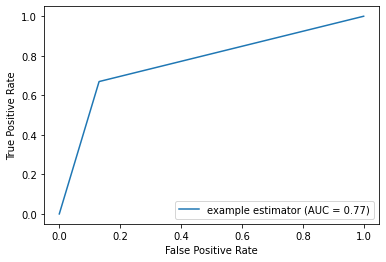

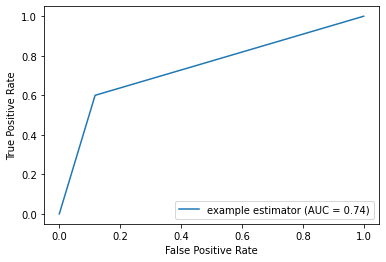

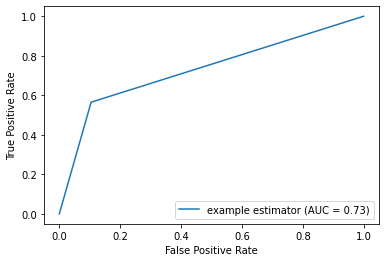

In [32]:
fpr, tpr, thresholds=metrics.roc_curve(val_y, pred_LR, pos_label = None)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
display.plot() 
plt.show()

fpr, tpr, thresholds=metrics.roc_curve(val_y, pred_RF, pos_label = None)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
display.plot() 
plt.show()

fpr, tpr, thresholds=metrics.roc_curve(val_y, pred_DT, pos_label = None)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
display.plot() 
plt.show()

**As we can notice from the graph above, LR model has the highest accuracy followed by RF model and finally Decision tree model.**
**This was the expected ranking of the models but here we estimated the actual accuracy of the test dataset not the expected accuracy and of course there is a difference.**